In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib

file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
teleco = pd.read_csv(file_path)

teleco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Churn Prediction**

In [3]:
teleco['Churn'] = teleco['Churn'].replace({'Yes': 1, 'No': 0})


In [4]:
teleco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
teleco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Checking for the duplicate rows and handling them**

In [6]:
duplicate_rows = teleco.duplicated()

print("Duplicate Rows except first occurrence:")
print(teleco[duplicate_rows])

teleco.drop_duplicates(inplace=True)
teleco.reset_index(drop=True, inplace=True)


Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [7]:
teleco.shape

(7043, 21)

## Exploratory Data Analysis Start

**Data Preprocessing**

In [8]:
teleco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [9]:
teleco.TotalCharges = pd.to_numeric(teleco.TotalCharges, errors='coerce')
teleco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
features = teleco.columns
for feature in features:
     print(f'{feature}--->{teleco[feature].nunique()}')

customerID--->7043
gender--->2
SeniorCitizen--->2
Partner--->2
Dependents--->2
tenure--->73
PhoneService--->2
MultipleLines--->3
InternetService--->3
OnlineSecurity--->3
OnlineBackup--->3
DeviceProtection--->3
TechSupport--->3
StreamingTV--->3
StreamingMovies--->3
Contract--->3
PaperlessBilling--->2
PaymentMethod--->4
MonthlyCharges--->1585
TotalCharges--->6530
Churn--->2


**Finding the missing values and using Interpolation to clean it**

In [12]:
def clean_dataset(teleco):
    assert isinstance(teleco, pd.DataFrame)
    teleco.dropna(inplace=True)
    indices_to_keep = ~teleco.isin([np.nan, np.inf, -np.inf]).any(1)
    return teleco[indices_to_keep].astype(np.float64)

In [13]:
teleco=teleco.interpolate()
teleco=teleco.dropna()
teleco.head()

C:\Users\Shashank\AppData\Local\Temp\ipykernel_5812\1043428101.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  teleco=teleco.interpolate()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [14]:
teleco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
teleco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
name = teleco.Contract.value_counts().index

In [17]:
val = teleco.Contract.value_counts().values

In [18]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1ec3005e950>,
 [Text(-0.17273219343040325, 1.0863533446134006, 'Month-to-month'),
  Text(-0.526752873107977, -0.9656766594841628, 'Two year'),
  Text(0.8709808402501051, -0.6718574074290027, 'One year')],
 [Text(-0.09421756005294721, 0.5925563697891275, '55.02%'),
  Text(-0.2873197489679874, -0.5267327233549979, '24.07%'),
  Text(0.4750804583182391, -0.36646767677945596, '20.91%')])

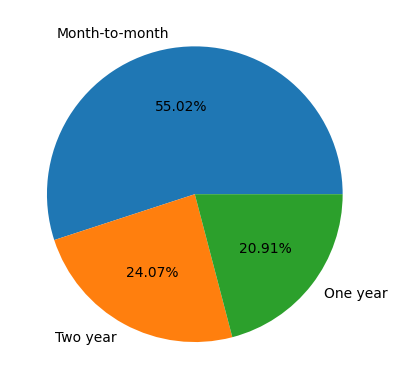

In [19]:
plt.pie(val,labels=name,autopct='%1.2f%%')

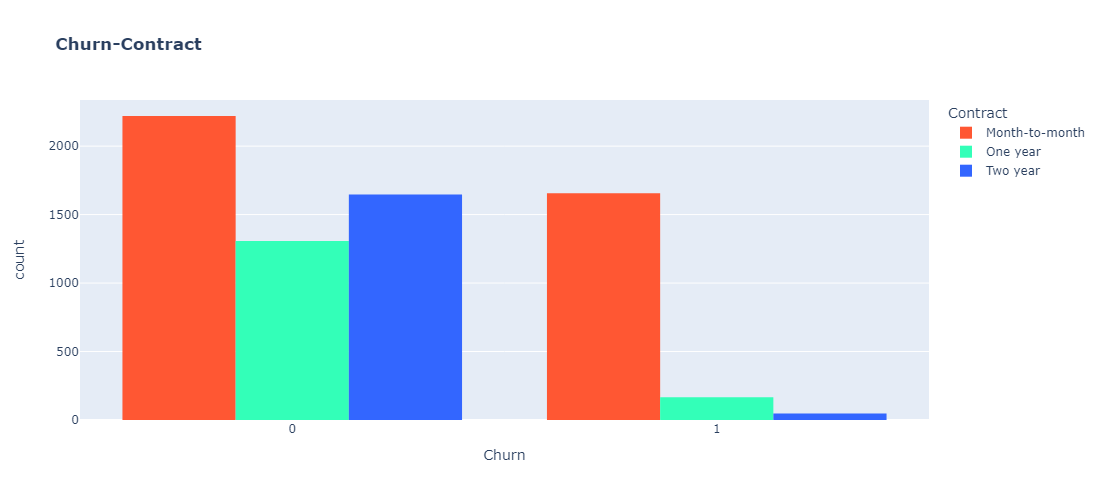

In [66]:
import plotly.express as px

# Define a custom color palette for Contract categories
color_palette = ['#FF5733', '#33FFB8', '#3366FF']  # Custom colors

fig = px.histogram(teleco, x="Churn", color="Contract", barmode="group",
                   title="<b>Churn-Contract </b>", color_discrete_sequence=color_palette)
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()


### Observations: Month to Month Churn is more compared to one year and Two year

In [43]:
temporary = teleco.groupby(['SeniorCitizen', 'InternetService', 'Contract' ,'MonthlyCharges', 'PaymentMethod','tenure','PaperlessBilling','Churn']).size().reset_index().rename(columns={0:'Count'})

In [21]:
temporary.head(20)

,SeniorCitizen,InternetService,Contract,MonthlyCharges,PaymentMethod,tenure,PaperlessBilling,Churn,Count
0,0,DSL,Month-to-month,23.45,Electronic check,1,Yes,1,1
1,0,DSL,Month-to-month,23.90,Electronic check,13,Yes,1,1
2,0,DSL,Month-to-month,24.15,Electronic check,35,No,0,1
3,0,DSL,Month-to-month,24.20,Mailed check,1,No,0,1
4,0,DSL,Month-to-month,24.25,Electronic check,1,Yes,1,1
5,0,DSL,Month-to-month,24.25,Mailed check,4,Yes,1,1
6,0,DSL,Month-to-month,24.30,Mailed check,2,No,0,1
7,0,DSL,Month-to-month,24.30,Mailed check,5,No,0,1
8,0,DSL,Month-to-month,24.40,Electronic check,1,Yes,0,1
9,0,DSL,Month-to-month,24.40,Mailed check,1,No,0,2


### Observations : SeniorCitizen who are using NO InternetService are loyal custmoers(Not Churn) with contract of Two-years paying more than 25 Monthly

In [22]:
import seaborn as sns
import matplotlib

In [23]:
matplotlib.rcParams['figure.figsize'] = (12,6)


<Axes: xlabel='PaymentMethod', ylabel='tenure'>

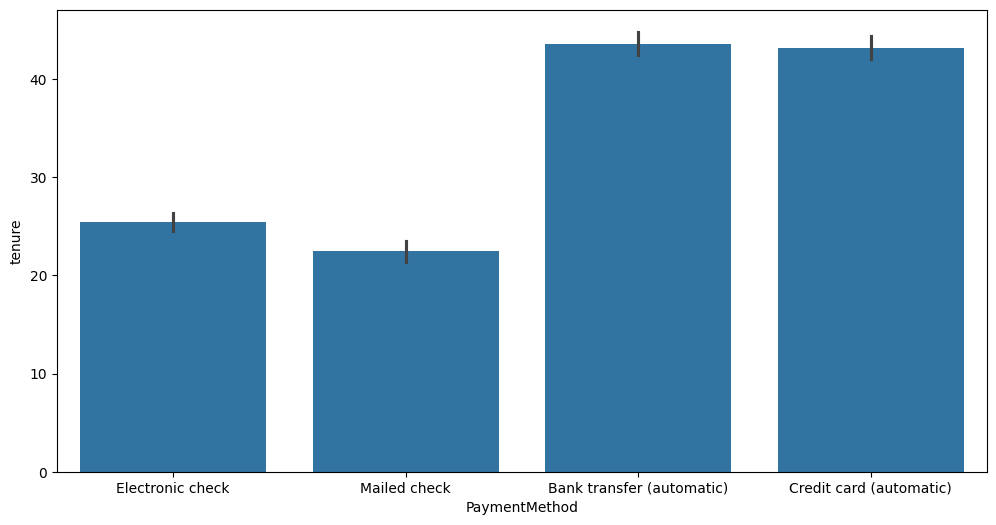

In [24]:
sns.barplot(x="PaymentMethod",y="tenure",data = temporary)

### Electronic check and Mailed check customers are more likely to Churn

In [25]:
teleco.shape

(7043, 21)

In [44]:
teleco_copy1 = teleco.copy()

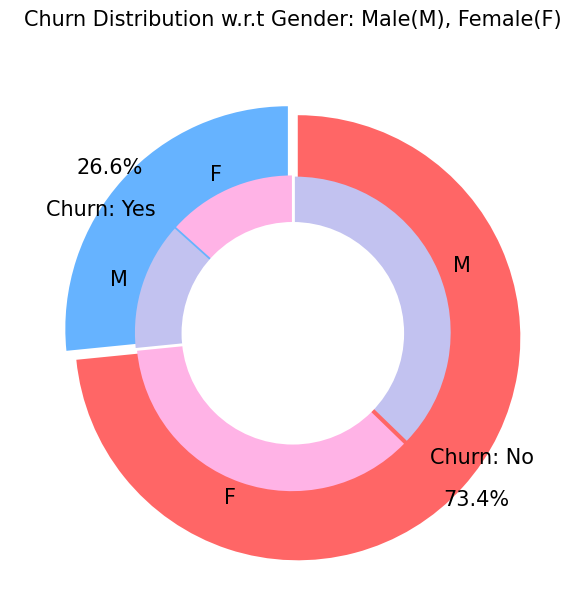

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['#66b3ff', '#ff6666']  # Updated color scheme
colors_gender = ['#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0']  # Updated gender color scheme
explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}


plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,
        colors=colors, startangle=90, frame=True, explode=explode, radius=10,
        textprops=textprops, counterclock=True)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90,
        explode=explode_gender, radius=7, textprops=textprops, counterclock=True)

centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Show plot
plt.axis('equal')
plt.tight_layout()
plt.show()


**Observation: Both Male and Female are equal churners**

**Dropping the column CustomerID**

In [26]:
teleco.drop('customerID', axis=1, inplace=True)

In [27]:
teleco_copy = teleco.copy()

**Using Feature Engineering to create Dummies**

In [28]:
teleco_copydemo = pd.get_dummies(teleco_copy, dtype=int)
teleco_copydemo.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


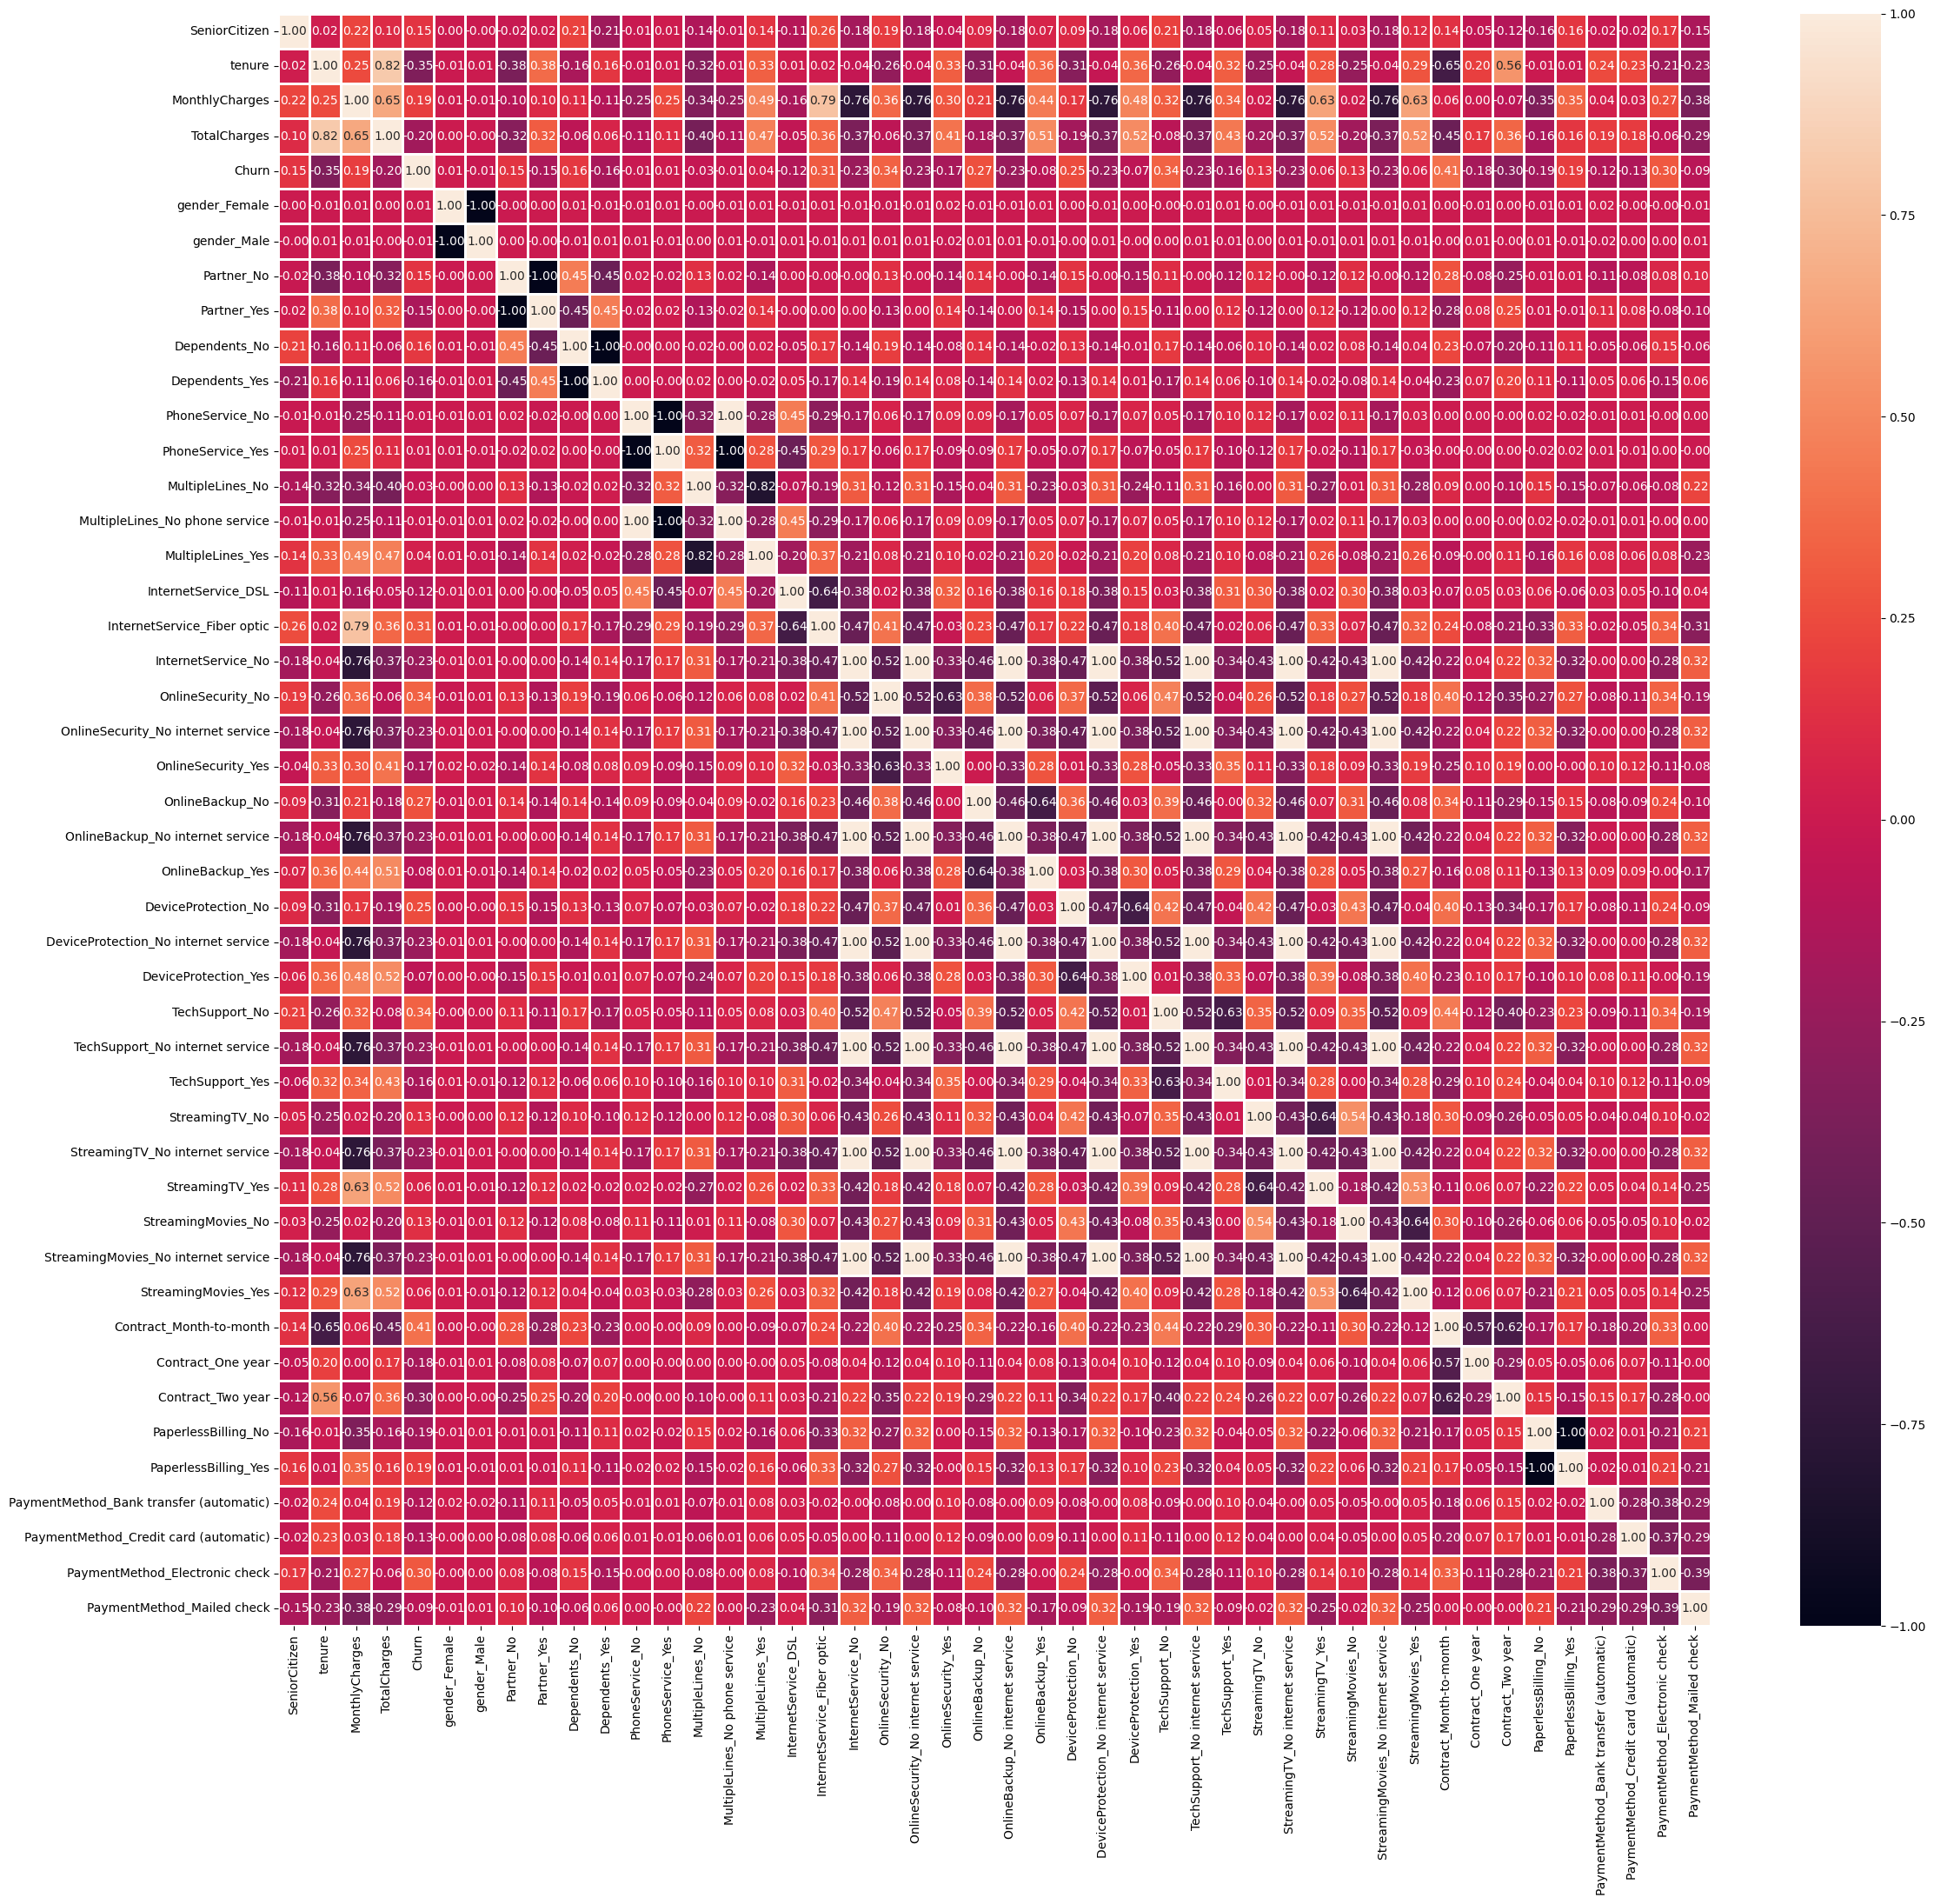

In [29]:
plt.figure(figsize=(24, 22))
sns.heatmap(teleco_copydemo.corr(), annot=True, fmt=".2f",  linewidths=1)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [30]:
teleco_copydemo.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [31]:
cols=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender','PhoneService','PaymentMethod','Contract','InternetService']

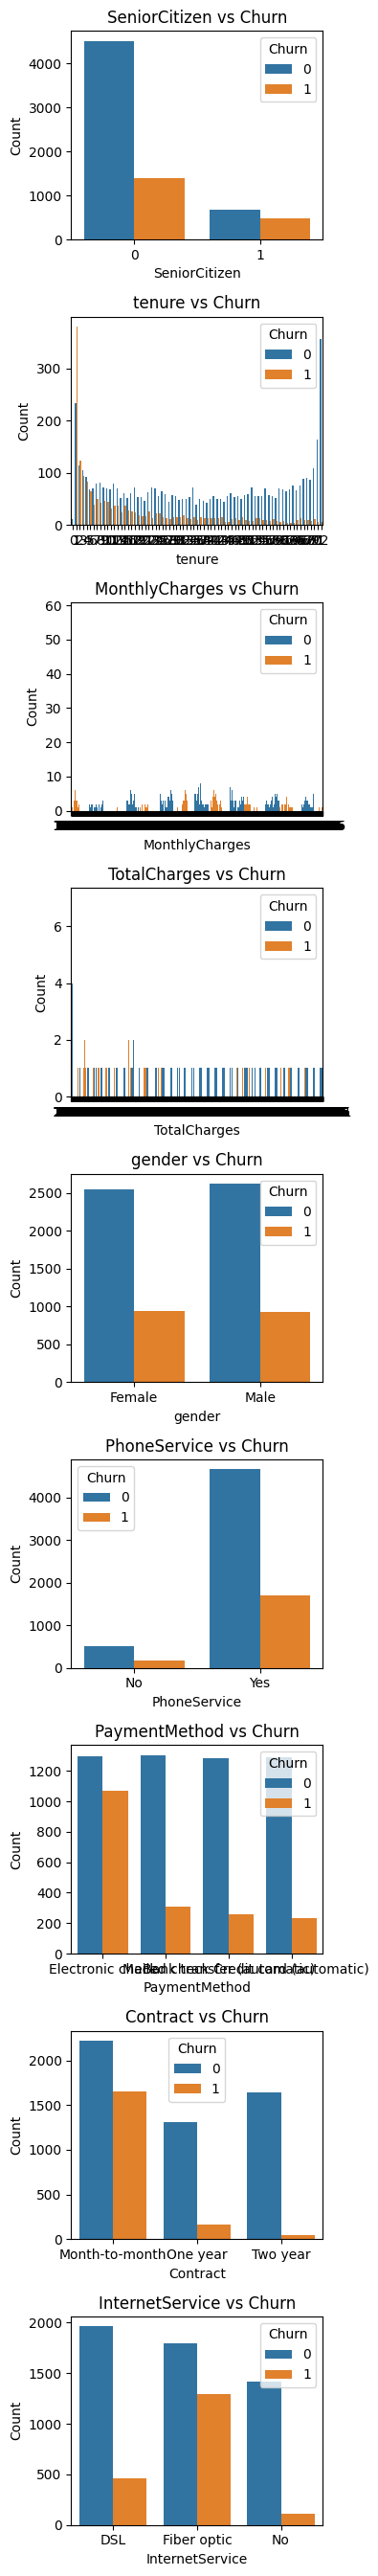

In [57]:
fig, ax = plt.subplots(len(cols), 1, figsize=(4, len(cols) * 3))

for i, col in enumerate(cols):
    sns.countplot(x=col, hue='Churn', data=teleco_copy, ax=ax[i])
    ax[i].set_title(f'{col} vs Churn')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Downloading the dataset**

In [33]:
teleco_copydemo.to_csv('finaldata.csv', index=False)